## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

In [2]:
import pandas as pd

In [29]:
# your answer here

df=pd.DataFrame.from_dict({0:35, 1:99, 2:104, 3:110, 4:62, 5: 25, 6: 10, 7: 3}, orient='index',columns=['Nr'])


from scipy.stats import poisson
from scipy.stats import chisquare
from scipy.stats import kstest


df['freq'] =df['Nr']/448

mu = 2.43
expected = poisson(mu=mu)


In [52]:
chisquare(df['Nr'], f_exp=expected.pmf(df.index)*448)
## can not reject that the distribution is not poisson ---> we have reason to assume that it is a poission distribution

Power_divergenceResult(statistic=5.576151312380053, pvalue=0.5900151813868506)

In [57]:
kstest(df['freq'], expected.cdf)
### in our case, we only have 7 observations that is more like a discrete distribution --> Chi-Test is better
## but still i am surprised that the pvalue is so different from the chisquare test???

KstestResult(statistic=0.9119631674176274, pvalue=7.216809931377781e-09)

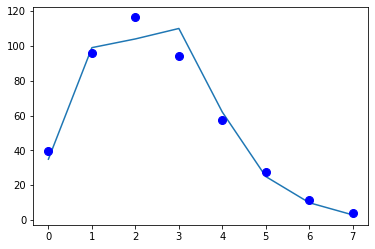

In [53]:
import numpy as np
import matplotlib. pyplot as plt 

plt.plot(df.index, df.Nr)
plt.plot(df.index, expected.pmf(df.index)*448, 'bo', ms=8, label='poisson pmf')
plt.show()

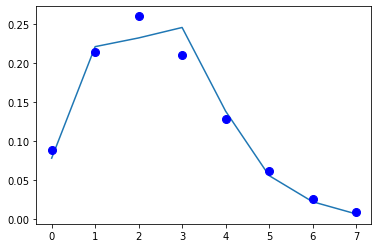

In [58]:
plt.plot(df.index, df.freq)
plt.plot(df.index, expected.pmf(df.index), 'bo', ms=8, label='poisson pmf')
plt.show()

## Question 2
The following are the ordered values of a random sample of SAT scores (university entrance exam) for several students: 852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063. In previous years, the scores were presented by N (985,50). Based on the sample, is there any reason to believe that there has been a change in the distribution of scores this year? Use the level alpha = 0.05. 

In [63]:
#your answer here
from scipy import stats
scores=[852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063]


n = stats.norm(loc=985, scale=50)
stats.kstest(scores, n.cdf)

## we can not reject the hypothesis, that the distribution of score this year is the same as last year --> they are probably the same

KstestResult(statistic=0.1581291279406798, pvalue=0.847406396427736)

## Question 3
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table2.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

Does the distribution of defective items follow this distribution?

In [109]:
# your code here
df=pd.DataFrame.from_dict({1:32, 2:15, 3:9, 4:4}, orient='index', columns=['Nr'])


df['freq'] =df['Nr']/60

mean = (df.index*df.Nr).sum()/df.Nr.sum()

expected = poisson(mu=mean)

In [110]:
chisquare(df['Nr'], f_exp=expected.pmf(df.index)*60)

## doesnt fit well the poission distribution, we can reject the 0 hypothesis at 5% significance-level, that they are the same

Power_divergenceResult(statistic=10.437622848246328, pvalue=0.015190062697291251)

In [111]:

## remark: i know, the ChiSquare Test is more appropriate, however i expectet the result to be similar to the ChiSquare test. : its not
kstest(df['freq'], expected.cdf)

KstestResult(statistic=0.8262260565495549, pvalue=0.0018237639311090295)

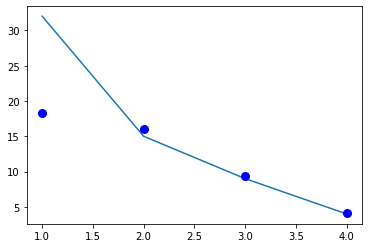

In [112]:

plt.plot(df.index, df.Nr)
plt.plot(df.index, expected.pmf(df.index)*60, 'bo', ms=8, label='poisson pmf')
plt.show()

## Question 4
A quality control engineer takes a sample of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

![](table3.png)


In [132]:
# your answer here

n=10
p=0.05

binomial = stats.binom(n,p)


df=pd.DataFrame.from_dict({0:138, 1:53, 2:9}, orient='index', columns=['Nr'])

In [141]:
x = np.arange(3)
expected = stats.binom.pmf(x, n, p)*200


In [142]:
expected

array([119.74738785,  63.02494097,  14.9269597 ])

In [144]:
stats.chisquare(df.Nr, f_exp=expected)
### it can not be rejected at a 5% level, that 5% of all tires have defects when testing 10 per day

Power_divergenceResult(statistic=6.730152995610064, pvalue=0.034559372300758)

## Question 5
A researcher gathers information about the patterns of Physical Activity of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (Low, Medium, High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (Yes = consumed, No = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table4.png)

In [125]:
#your answer here
df=pd.DataFrame.from_dict({'low':[32,12], 'medium':[14, 22], 'high':[6,9]}, orient='index', columns=['yes','no'])
df

,yes,no
low,32,12
medium,14,22
high,6,9


In [126]:

from scipy.stats import chi2_contingency
chi2, pvalue, dof, expected = chi2_contingency(df)

print(pvalue)
# Interpretation: the  difference in frequencies is statistically significant at the 5% level, 
#--> there is a difference btw kids drinking / not drinking sugary drinks regarding  physical activity


0.004719280137040844


array([[24.08421053, 19.91578947],
       [19.70526316, 16.29473684],
       [ 8.21052632,  6.78947368]])